# Regularization

In linear regression, Regularization comprises of technique that are used for addressing issues like overfitting.

## Core Concept
Regularization technique achieves their objectives by introducing a penalty term to the model's objective function. This objective function (in regression) typically measured by mean squared error, is minimised during the training prcess.
The Penalty term discourages the model  to attain excessive complexity by penalizing the size of the model coefficients, there by mitigating overfitting.
<br>
**Regularization Term** - $\alpha$ - It is a hyperparameter that scales the penalty term and controls the strength of the regularization.

- Higher $\alpha$ - Imposes Stronger penalty on the coefficients, leading to greater regularization. This tends to create a simple model that be an underfit on training data.
- Lower $\alpha$ - Imposes weaker penalty on the coefficients, leading to less restricted regularization. This tends to create a complex model that may still capture mode details like in data and cause overfitting.

  **Common Techniques Used in Reqularization are**
- Lasso Regression(L1 Regularization)
- Ridge Regression(L2 Regularization)

### Least Absolute Srinkage and Selection Operator (Lasso) Regression

It uses Regression model but also performs a so called L1 Regualrization, which introduces additional information to prevent overfitting. Lasso performs veriable selection by using a technique that regularizes the coefficients(It shrinks the coefficients estimates towards zero). It achieves that by adding penalty term as scaled value of absolute sum of coefficient.

$$
\text RSS = \sum_{i=1}^n \left( y_i - \left( \beta_0 + \sum_{j=1}^p \beta_j x_{ij} \right) \right)^2
$$


In Lasso Regression the minimization objective becomes

$$
\sum_{i=1}^n \left( y_i - \left( \beta_0 + \sum_{j=1}^p \beta_j x_{ij} \right) \right)^2  + \alpha \sum_{j=1}^p |\beta_j|
$$


In simple terms

$$
\text RSS + \alpha \sum_{j=1}^p |\beta_j|
$$


Where $\alpha$ can take various values
- $\alpha = 0$ : Same coefficient of Regression as Linear Regression
- $\alpha = \infty$ : All coefficient becomes Zero
  

In [1]:
### Implement Lasso

import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, LinearRegression, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('Hitters.csv')

df.head(5)

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [3]:
df = df.drop(columns = 'Unnamed: 0')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [5]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [6]:
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())

In [7]:
df = pd.get_dummies(df, drop_first = True, dtype = 'int')

In [8]:
df.shape

(322, 20)

In [9]:
df.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

In [10]:
X = df.drop(columns = ['Salary'])
y = df['Salary']

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [13]:
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [14]:
print(f"Lasso Coefficient : {lasso_model.coef_}\n")

print(f"lasso Intercept : {lasso_model.intercept_}")

Lasso Coefficient : [-276.75569069  208.77740083    0.           34.41436114   42.19185746
   71.30961956  -61.27612833  -25.1089289     0.           -0.
  298.39159765   74.36712668 -133.39670441   74.96920788   53.8801894
  -31.18714449   18.43166661  -54.75015697   -7.99532438]

lasso Intercept : 537.1814122953322


In [15]:
coefs = pd.DataFrame(lasso_model.coef_, index = df.drop(columns = ['Salary']). columns, columns = ['Coefs'])
coefs

,Coefs
AtBat,-276.755691
Hits,208.777401
HmRun,0.000000
Runs,34.414361
RBI,42.191857
Walks,71.309620
Years,-61.276128
CAtBat,-25.108929
CHits,0.000000
CHmRun,-0.000000


In [16]:
X_train.shape

(257, 19)

In [17]:
### Model Evaluation
### training Data

pred_train = lasso_model.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
r2_train = r2_score(y_train, pred_train)

print(f'MSE on training Data: {mse_train}')
print(f'R2 Score on training Data: {r2_train:.4f}')

print('----------------------------------------')

### Testing Data
pred_test = lasso_model.predict(X_test)
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

print(f'MSE on testing data: {mse_test}')
print(f'R2 Score on testing Data: {r2_test:.4f}')


MSE on training Data: 88911.87980827696
R2 Score on training Data: 0.4456
----------------------------------------
MSE on testing data: 108135.45606289332
R2 Score on testing Data: 0.4181


In [18]:
### Impact of Alpha parameter

alphas = np.linspace(0.01, 500, 100)
lasso = Lasso(max_iter = 10000)
coefs = []
r2 = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    r2score = r2_score(y_test, lasso.predict(X_test))
    coefs.append(lasso.coef_)
    r2.append(r2score)


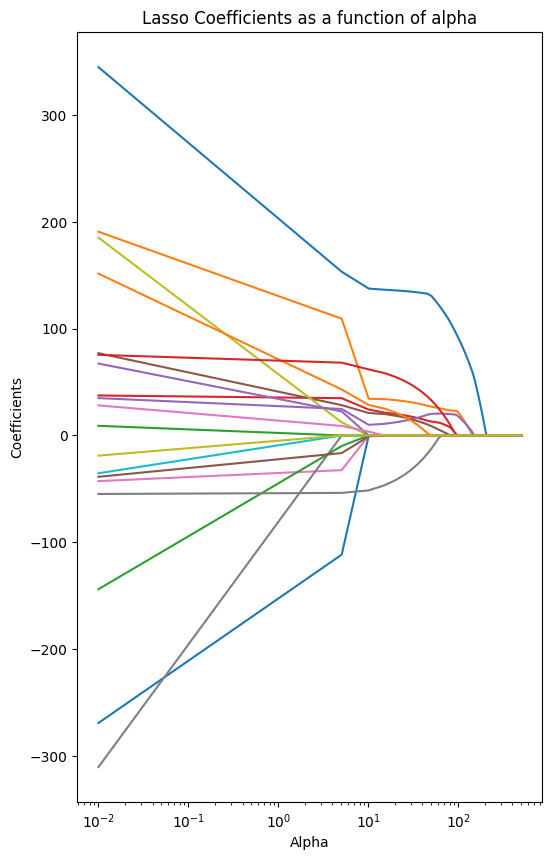

In [19]:
### Visualize
### Relation of alphas with coefficients

plt.figure(figsize = (6,10))

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients as a function of alpha')
plt.show()


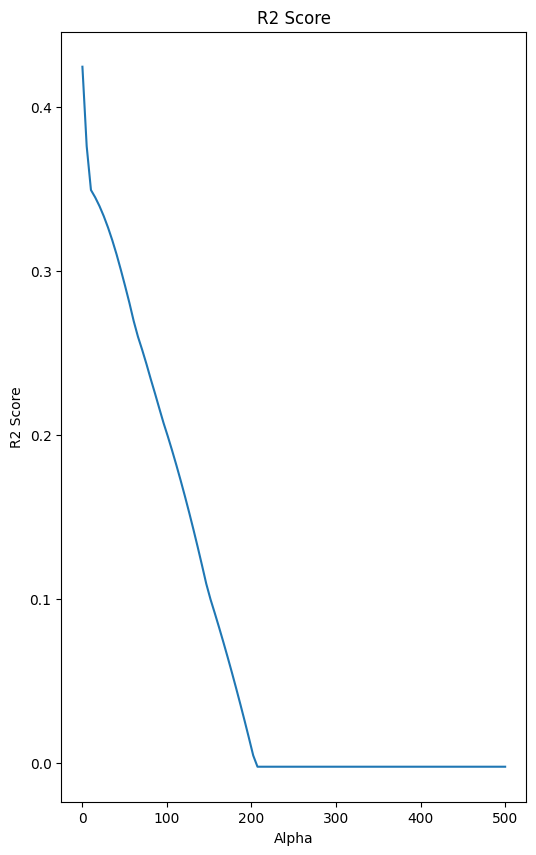

In [20]:
### Relationship of alphas with R2
plt.figure(figsize = (6,10))

plt.plot(alphas, r2)
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('R2 Score')
plt.show()

In [21]:
### Implement Lasso with CV
np.random.seed(10)
lasso_cv_model = LassoCV(alphas = np.random.randint(0,1000,100), cv = 10, max_iter = 10000, n_jobs = -1)
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([265, 125, 996, 527, 320, 369, 123, 156, 985, 733, 496, 925, 881,
         8,  73, 256, 490,  40, 502, 420, 371, 528, 356, 239, 395,  54,
       344, 363, 122, 574, 545, 200, 868, 974, 689, 691,  54,  77, 453,
        13, 755, 409, 382, 653, 860, 342, 798, 670,  89, 652, 321, 543,
       825, 804, 283, 530,  93,  77, 406, 919, 606, 760, 395, 668,  74,
       216, 393,  15, 530, 464, 630,  71, 344, 395, 657, 430, 135, 715,
       796, 801, 468, 762, 864, 472,  44, 645,   4,  71, 344, 856, 818,
       364, 182, 290, 360, 783, 461, 856, 655, 134], dtype=int32),
        cv=10, max_iter=10000, n_jobs=-1)

In [22]:
print(f'Best alpha value:  {lasso_cv_model.alpha_}')

Best alpha value:  15


In [23]:
### Tuned 

lasso_tuned  = Lasso(alpha = 15, max_iter = 10000)
lasso_tuned.fit(X_train, y_train)


### training Data

pred_train = lasso_tuned.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
r2_train = r2_score(y_train, pred_train)

print(f'MSE on training Data: {mse_train}')
print(f'R2 Score on training Data: {r2_train:.4f}')

print('----------------------------------------')

### Testing Data
pred_test = lasso_tuned.predict(X_test)
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

print(f'MSE on testing data: {mse_test}')
print(f'R2 Score on testing Data: {r2_test:.4f}')

MSE on training Data: 98383.5695872826
R2 Score on training Data: 0.3865
----------------------------------------
MSE on testing data: 121688.04898867624
R2 Score on testing Data: 0.3452


### Ridge Regression
Also known as L2 Regularization and it helps in handling multicollinear data .ie where 2 features are highly correlated

$$
\text RSS = \sum_{i=1}^n \left( y_i - \left( \beta_0 + \sum_{j=1}^p \beta_j x_{ij} \right) \right)^2
$$


In Ridge Regression the minimization objective becomes

$$
\sum_{i=1}^n \left( y_i - \left( \beta_0 + \sum_{j=1}^p \beta_j x_{ij} \right) \right)^2  + \alpha \sum_{j=1}^p \beta_{j}^{2}
$$


In simple terms

$$
\text RSS + \alpha \sum_{j=1}^p \beta_{j}^{2}
$$


Where $\alpha$ can take various values
- $\alpha = 0$ : Same coefficient of Regression as Linear Regression
- $\alpha = \infty$ : All coefficient holds minimal explanation

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
### Using train test Split from previous example

Ridge_model = Ridge(alpha = 1)
Ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [26]:
print(f"Ridge Intercept : {Ridge_model.intercept_}")

coefsR = pd.DataFrame(Ridge_model.coef_, index = df.drop(columns = ['Salary']). columns, columns = ['Ridge Coefs'])
coefsR

Ridge Intercept : 537.144342376327


,Ridge Coefs
AtBat,-258.972400
Hits,176.418466
HmRun,0.063960
Runs,49.926922
RBI,41.424798
Walks,70.808530
Years,-58.075642
CAtBat,-162.045902
CHits,141.499330
CHmRun,-10.330053


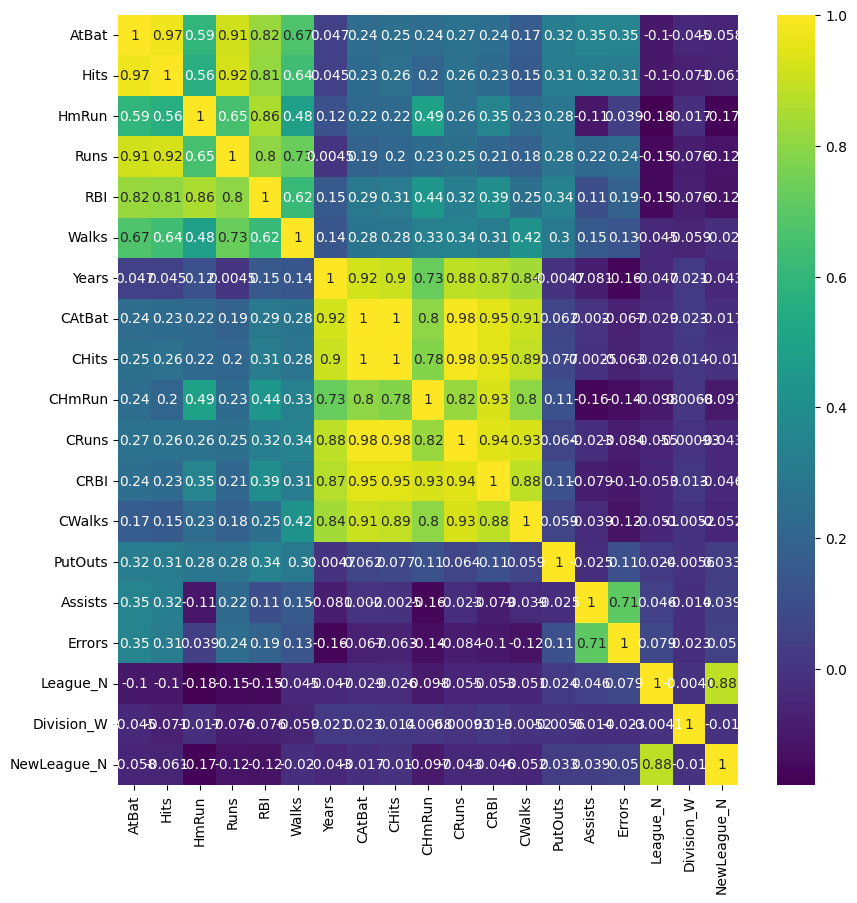

In [27]:
import seaborn as sns

plt.figure(figsize = (10,10))
sns.heatmap(df.drop(columns = ['Salary']).corr(), annot = True, cmap = 'viridis')
plt.show()

In [28]:
### Model Evaluation
### training Data

pred_train = ridge_model.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
r2_train = r2_score(y_train, pred_train)

print(f'MSE on training Data: {mse_train}')
print(f'R2 Score on training Data: {r2_train:.4f}')

print('----------------------------------------')

### Testing Data
pred_test = ridge_model.predict(X_test)
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

print(f'MSE on testing data: {mse_test}')
print(f'R2 Score on testing Data: {r2_test:.4f}')


NameError: name 'ridge_model' is not defined

In [ ]:
### Implement Ridge with CV
np.random.seed(10)
Ridge_cv_model = RidgeCV(alphas = np.linspace(1,100,100), cv = 10)
Ridge_cv_model.fit(X_train, y_train)

In [ ]:
print(f'Best alpha value:  {Ridge_cv_model.alpha_}')

In [ ]:
### Tuned 
Ridge_tuned = Ridge(alpha = Ridge_cv_model. alpha_)
Ridge_tuned.fit(X_train, y_train)

### training Data

pred_train = Ridge_tuned.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
r2_train = r2_score(y_train, pred_train)

print(f'MSE on training Data: {mse_train}')
print(f'R2 Score on training Data: {r2_train:.4f}')

print('----------------------------------------')

### Testing Data
pred_test = Ridge_tuned.predict(X_test)
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

print(f'MSE on testing data: {mse_test}')
print(f'R2 Score on testing Data: {r2_test:.4f}')

## HyperParameter Tuning

- It is model optimization technique.
- It is a process of finding the best settings for the parameters in an ML model.
- HyperParameters ae settings which are not learnt during training rather are set before the training process.
- HyperParameter tuning involves trying different combinations of different combinations of hyperparameters and evaluting models performance using validation techniques.
- Some common types are.
    - Grid Search : It performs an exhaustive search on specified parameter grid.
  **How it works**
        - Define a parameter grid
        - Combination Evaluation
        - Model Training
        - Optimal Parameters

    - Random Search : It explores Hyperparameter space by sampling a fixed number of parameter settings from specifie distribution.<br>
    **How it works**
         - Define Parameter Distribution
         - Random Sampling
         - Model Training
         - Optimal Parameters
          

In [ ]:
### Implement Grid Search with Cross Validation.(Uisng Hitters.csv data)

from sklearn.model_selection import GridSearchCV, KFold

kf = KFold(n_splits = 10, random_state = 25, shuffle = True)

grid = {'alpha': np.arange(0,1,0.1), 'solver' :['svd','cholesky','sag','saga']}
model = Ridge()

search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv =kf, n_jobs = -1)

results = search.fit(X_train, y_train)

In [ ]:
print(f'Best MAE : {np.abs(results.best_score_)}')
print(f'Best Parameters : {results.best_params_}')

## SKlearn Pipeline

Pipeline provides an organised approch to managing the preprocessing and modelling code. They combine preprocessing and modelling steps into a single, streamlined process.

#### Syntax

**class sklearn.pipeline.Pipeline(steps, '*', memory = None, verbose = False)**

- A pipeline is a sequence of data transformers that can include the final predictor
- Each intermediate step in the pipeline must have fit_tranform method, while the final step only need fit.
- You can set parameters for any step by using name followed by a double underscore (__) and the parameter name.

### Implementing Pipeline

In [29]:
#### import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#### Load the data

hd = pd.read_csv('housing_with_ocean_proximity.csv')

hd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [31]:
from sklearn.model_selection import train_test_split

In [51]:
#### Seperate Featues and Targets
#### Perform Train Test Split

X = hd.drop(columns=['median_house_value'])
y = hd['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 25)

In [53]:
print(X_train.info())
print(X_train.isnull().sum())
print(X_train.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 14448 entries, 8275 to 6618
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14308 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.1+ MB
None
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        140
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64
          longitude      latitude  housing_median_ag

#### Preprocessing Tasks
      - Missing value treatment
      - Dummy variable creation for categorical data
      - Standardize numerical variable

In [56]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Column Transformer class allows you to apply different preprocessing steps to different subsets of data
# It is useful when we have mix of both numerical annd categorical columns

In [59]:
hd_cat = X_train.select_dtypes(include = 'object').columns
hd_num = X_train.select_dtypes(exclude = 'object').columns

In [60]:
# Numeric variable Pipeline

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler())
])

In [61]:
# Categorical variable Pipeline

cat_pipeline = Pipeline([
    ('ohe', OneHotEncoder (handle_unknown = 'ignore')),
])

In [62]:
# Unified Data Preprocessing with Pipelines and column transformer

preprocessing = ColumnTransformer([
    ('num', num_pipeline, hd_num),
    ('cat', cat_pipeline, hd_cat)
])

In [64]:
# Checking by feeding the data to the pipeline

check_train = preprocessing.fit_transform(X_train)

In [65]:
check_train_df = pd.DataFrame(check_train)

check_train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.699250,-0.864452,-1.089310,1.016708,2.027926,1.469994,1.897157,-0.919602,0.0,0.0,0.0,0.0,1.0
1,0.819708,-0.803278,-0.133230,-0.032460,-0.545567,-0.476886,-0.485367,2.985466,1.0,0.0,0.0,0.0,0.0
2,0.714308,-0.704457,1.380563,0.247630,-0.255323,-0.283616,-0.200847,3.607619,1.0,0.0,0.0,0.0,0.0
3,-1.207997,0.759023,0.583830,0.841066,0.233253,0.257184,0.291081,2.083775,1.0,0.0,0.0,0.0,0.0
4,1.211196,-1.146795,-1.408003,1.367055,1.060448,0.772274,1.253663,-0.087033,1.0,0.0,0.0,0.0,0.0


In [66]:
check_train_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [68]:
# Build a Regression Model and Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

In [69]:
model = Ridge()

In [70]:
# Create a model with complete pipeline

final_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('model_ridge', model)
])

In [71]:
grid = {'model_ridge__alpha' : np.arange(0.1,2,0.1)}

search = GridSearchCV(estimator = final_pipeline, param_grid = grid, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)

In [77]:
res = search.fit(X_train, y_train)

print(f'MAE : {np.abs(res.best_score_)}')
print(f'Config : {res.best_params_}')

MAE : 49833.327990926555
Config : {'model_ridge__alpha': np.float64(0.1)}


In [79]:
# Testing Pipeline on Test Data for prediction

y_test_pred = search.predict(X_test)

#MAE on test set

print(f'MAE on test set : {mean_absolute_error(y_test, y_test_pred)}')

MAE on test set : 50042.22407786933


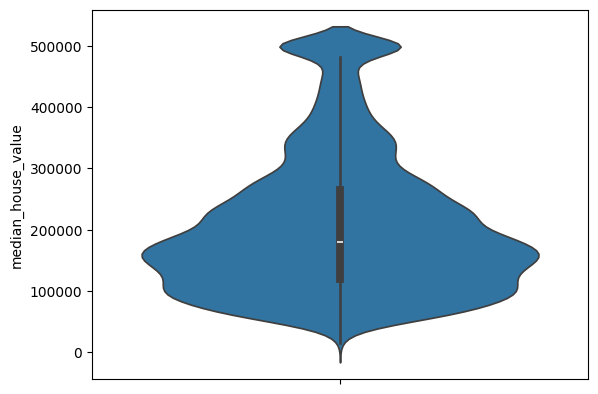

In [89]:
sns.violinplot(hd.median_house_value)
plt.show()

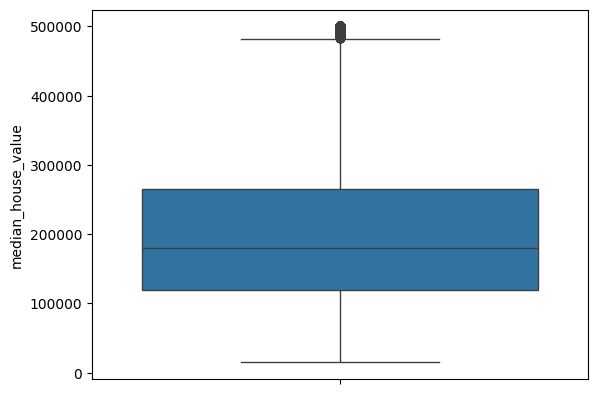

In [90]:
sns.boxplot(hd.median_house_value)
plt.show()